In [ ]:
# only from topic modeling

In [ ]:
# bert topic hdbscan, yes no on non judgemental x->y llm response

In [20]:
import os
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import csv

# === Input files
root_dir = r"M:\FULL_DATA_COLLECTED\FINAL_DATASET"
yes_file = os.path.join(root_dir, "prompt4YesNo", "Yes", "gpt4o_task_action_final_yes.xlsx")
no_file = os.path.join(root_dir, "prompt4YesNo", "No", "gpt4o_task_action_final_no.xlsx")

# === Output directory
output_dir = os.path.join(root_dir, "prompt4YesNo")
summary_csv = os.path.join(output_dir, "topic_summary.csv")
summary_xlsx = os.path.join(output_dir, "topic_summary.xlsx")
doc_topics_csv = os.path.join(output_dir, "doc_topics.csv")
doc_xlsx = os.path.join(output_dir, "doc_topics.xlsx")
target_dist_csv = os.path.join(output_dir, "target_distribution.csv")

# === Load and merge labeled Task–Action files
df_yes = pd.read_excel(yes_file)
df_no = pd.read_excel(no_file)
df = pd.concat([df_yes, df_no], ignore_index=True)

# === Rename content column if needed
if "Task-Action Response" in df.columns:
    df["text"] = df["Task-Action Response"]
else:
    raise ValueError("Missing 'Task-Action Response' column.")

# === Clean up empty values
df = df[df["text"].notna() & (df["text"].str.strip() != "")]

print(f"📄 Loaded {len(df)} Task–Action responses (Target 1: {df['Target'].sum()}, Target 0: {len(df) - df['Target'].sum()})")

# === Embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# === BERTopic with HDBSCAN
vectorizer_model = CountVectorizer(stop_words="english")
topic_model = BERTopic(
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    verbose=True
)

# === Fit model
docs = df["text"].tolist()
topics, probs = topic_model.fit_transform(docs)

# === Save topic summary
topic_info = topic_model.get_topic_info()
topic_info.to_csv(summary_csv, index=False, quoting=csv.QUOTE_ALL)
topic_info.to_excel(summary_xlsx, index=False)

# === Save document-topic assignments
doc_info = topic_model.get_document_info(docs)
doc_info["file"] = df["Prompt File"]
doc_info["target"] = df["Target"]
doc_info.to_csv(doc_topics_csv, index=False, quoting=csv.QUOTE_ALL)
doc_info.to_excel(doc_xlsx, index=False)

# === Target distribution + size
target_distribution = doc_info.groupby("Topic")["target"].value_counts(normalize=True).unstack().fillna(0)
cluster_sizes = doc_info["Topic"].value_counts().sort_index()
target_distribution["Size"] = cluster_sizes
target_distribution.to_csv(target_dist_csv)

# === Final output
print("\n✅ Output saved:")
print(f"- Topic summary CSV:   {summary_csv}")
print(f"- Topic summary XLSX:  {summary_xlsx}")
print(f"- Doc topics CSV:      {doc_topics_csv}")
print(f"- Doc topics XLSX:     {doc_xlsx}")
print(f"- Target distribution: {target_dist_csv}")

# === Display results
print("\n🔍 Target distribution by topic (% + size):")
percent_cols = target_distribution.drop(columns="Size") * 100
percent_cols["Size"] = target_distribution["Size"]
print(percent_cols.round(2))


📄 Loaded 822 Task–Action responses (Target 1: 390, Target 0: 432)


2025-04-18 15:59:15,792 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/26 [00:00<?, ?it/s]

2025-04-18 15:59:49,685 - BERTopic - Embedding - Completed ✓
2025-04-18 15:59:49,686 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-18 15:59:52,168 - BERTopic - Dimensionality - Completed ✓
2025-04-18 15:59:52,171 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-18 15:59:52,280 - BERTopic - Cluster - Completed ✓
2025-04-18 15:59:52,287 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-18 15:59:52,408 - BERTopic - Representation - Completed ✓



✅ Output saved:
- Topic summary CSV:   M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\topic_summary.csv
- Topic summary XLSX:  M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\topic_summary.xlsx
- Doc topics CSV:      M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\doc_topics.csv
- Doc topics XLSX:     M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\doc_topics.xlsx
- Target distribution: M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\target_distribution.csv

🔍 Target distribution by topic (% + size):
target      0      1  Size
Topic                     
-1      52.27  47.73   331
 0      67.86  32.14    56
 1      53.49  46.51    43
 2      53.49  46.51    43
 3      46.34  53.66    41
 4      31.58  68.42    38
 5      55.56  44.44    36
 6      62.86  37.14    35
 7      75.76  24.24    33
 8      19.35  80.65    31
 9      50.00  50.00    28
 10     40.74  59.26    27
 11     51.85  48.15    27
 12     60.00  40.00    25
 13     64.71  35.29    17
 14     54.55  45.45   

In [ ]:
# result representation in xlsx

In [ ]:
import pandas as pd

# === Manual cluster data ===
data = {
    "Topic": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
    "Size": [319, 54, 42, 41, 39, 37, 36, 35, 34, 31, 30, 29, 18, 15, 15, 14, 12, 11, 10],
    "% Target=0": [51.41, 68.52, 54.76, 75.61, 53.85, 32.43, 58.33, 48.57, 50.00, 22.58, 63.33, 48.28, 61.11, 46.67, 60.00, 71.43, 58.33, 27.27, 40.00],
    "% Target=1": [48.59, 31.48, 45.24, 24.39, 46.15, 67.57, 41.67, 51.43, 50.00, 77.42, 36.67, 51.72, 38.89, 53.33, 40.00, 28.57, 41.67, 72.73, 60.00],
    "Top Keywords": [
        ['task', 'action', 'added', 'developer', 'function', 'check', 'ensure', 'prevent', 'error', 'code'],
        ['url', 'action', 'task', 'content', 'page', 'check', 'added', 'csp', 'developer', 'document'],
        ['socket', 'skb', 'sk', 'function', 'action', 'task', 'ensure', 'removed', 'destination', 'code'],
        ['msg_namelen', 'memory', 'memset', 'leak', 'initialize', 'information', 'structure', 'initialized', 'ensuring', 'zero'],
        ['overflow', 'buffer', 'size', 'integer', 'snprintf', 'allocation', 'developer', 'action', 'task', 'issue'],
        ['image', 'pixel', 'columns', 'width', 'allocation', 'number', 'images', 'bytes_per_line', 'color', 'action'],
        ['length', 'bounds', 'packet', 'buffer', 'checks', 'pkt_len', 'nd_tcheck', 'check', 'read', 'data'],
        ['user', 'pid', 'task', 'check', 'file', 'permission', 'privileges', 'function', 'current', 'action'],
        ['length', 'len', 'size', 'action', 'condition', 'task', 'string', 'check', 'added', 'return'],
        ['php', 'version', 'bug', 'zval', 'memory', 'related', 'function', 'zend_string', 'include', 'string'],
        ['return', 'action', 'task', 'invalid', 'check', 'added', 'code', 'error', 'prevent', 'ret'],
        ['lock', 'locking', 'timer', 'race', 'shm_file', 'task', 'function', 'operations', 'functions', 'po'],
        ['vcpu', 'kvm', 'guest', 'calls', 'cr4', 'mode', 'vm', 'x2apic', 'value', 'action'],
        ['invalid', 'stack', 'pointer', 'mask', 'address', 'condition', 'reg', 'fibsize', 'ta', 'walk'],
        ['pages', 'vma', 'page', 'bio', 'memory', 'mappings', 'iommu', 'tlb', 'vm_ops', 'slots'],
        ['buffer', 'usb', 'memory', 'allocated', 'stack', 'kmalloc', 'buffers', 'dma', 'heap', 'using'],
        ['inode', 'extents', 'bp', 'inodes', 'flags', 'ext4_convert_unwritten_extents_endio', 'logic', 'range', 'inline', 'new'],
        ['iovec', 'copy', 'iov', 'allocation', 'copied', 'function', 'bytes', 'length', 'developer', 'iov_len'],
        ['path', 'nd', 'symlink', 'directory', 'mnt', 'dentry', 'path_connected', 'exclusive', 'links', 'target']
    ]
}

# === Human-readable summaries for each topic
summaries = [
    "General task/action intent; developer-intended changes across various areas",
    "Web content actions with URL/task logic, possible CSP/document handling",
    "Socket/SKB layer operations and destination handling",
    "Memory leak fix via msg_namelen memset initialization",
    "Buffer/size overflow and integer boundary checks",
    "Image pixel width and layout calculations",
    "Packet length and buffer bounds validation",
    "Permission checks using user/pid/task associations",
    "Length/size condition validation, string safety",
    "PHP/Zend memory/string handling vulnerabilities",
    "Return path and error code validation logic",
    "Locking and race condition control with timers",
    "KVM/vCPU guest mode and register interactions",
    "Stack pointer/mask validation logic",
    "Page mapping and IOMMU memory layout",
    "USB memory/buffer allocation and DMA setup",
    "Inode/ext4 extent handling logic",
    "iovec allocation and memory copy logic",
    "Path traversal and symlink/directory validation"
]

# === Create DataFrame
df = pd.DataFrame(data)

# === Add summaries
df["Cluster Summary"] = summaries

# === Label clusters based on vulnerability ratio
def classify(row):
    if row["% Target=1"] >= 65:
        return "High Vulnerability (🟥)"
    elif row["% Target=0"] >= 65:
        return "Likely Safe (🟩)"
    else:
        return "Mixed/Neutral (🟨)"

df["Cluster Type"] = df.apply(classify, axis=1)

# === Save to Excel
output_path = r"M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\llm_topic_cluster_summary.xlsx"
df.to_excel(output_path, index=False)

print(f"✅ Saved summary to:\n{output_path}")


In [ ]:
# project wise cluster distribution

In [11]:
import pandas as pd
import os

# === Input & Output Paths
doc_topics_path = r"M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\doc_topics.csv"
output_csv = r"M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\top_projects_per_topic_hdbscan.csv"

# === Load topic assignments
df = pd.read_csv(doc_topics_path)

# === Extract project name from file (e.g., 21_openssh_abc123.txt → openssh)
df["Project"] = df["file"].str.extract(r"^\d+_([^_]+)_")

# === Count samples per (Topic, Project)
topic_project_counts = df.groupby(["Topic", "Project"]).size().reset_index(name="Count")

# === Total samples per topic
topic_totals = topic_project_counts.groupby("Topic")["Count"].sum().reset_index(name="Total")

# === Merge to calculate % per project
merged = pd.merge(topic_project_counts, topic_totals, on="Topic")
merged["Percentage"] = 100 * merged["Count"] / merged["Total"]

# === Top 10 projects per topic
top_projects = (
    merged.sort_values(["Topic", "Percentage"], ascending=[True, False])
    .groupby("Topic")
    .head(10)
)

# === Clean and format
top_projects["Percentage"] = top_projects["Percentage"].round(2)
top_projects = top_projects[["Topic", "Project", "Count", "Percentage"]]

# === Save to CSV
top_projects.to_csv(output_csv, index=False)

print(f"✅ Top projects per topic saved to:\n{output_csv}")


✅ Top projects per topic saved to:
M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\top_projects_per_topic_hdbscan.csv


In [ ]:
# topic 0 - dig deeper

In [ ]:
# with sub-topic clustering 

In [19]:
import os
import pandas as pd
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from hdbscan import HDBSCAN
from umap import UMAP

# === Paths ===
base_dir = r"M:\\FULL_DATA_COLLECTED\\FINAL_DATASET\\prompt4YesNo"
yes_path = os.path.join(base_dir, "Yes", "gpt4o_task_action_final_yes.xlsx")
no_path = os.path.join(base_dir, "No", "gpt4o_task_action_final_no.xlsx")
out_path = os.path.join(base_dir, "topic_with_subtopics_full.xlsx")

# === Load and merge
print("📥 Loading data...")
df_yes = pd.read_excel(yes_path)
df_no = pd.read_excel(no_path)
df = pd.concat([df_yes, df_no], ignore_index=True)
df = df[df["Task-Action Response"].notna() & (df["Task-Action Response"].str.strip() != "")]

# === Prepare inputs
docs = df["Task-Action Response"].tolist()
targets = df["Target"].tolist()
file_names = df["Prompt File"].tolist()

# === BERTopic main model
print("🧠 Running main topic model...")
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
vectorizer_model = CountVectorizer(stop_words="english")
main_model = BERTopic(
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    representation_model=KeyBERTInspired(),
    umap_model=UMAP(random_state=42),
    hdbscan_model=HDBSCAN(prediction_data=True),
    verbose=False
)
topics, _ = main_model.fit_transform(docs)

# === Save main topic info
df_all = pd.DataFrame({
    "Prompt File": file_names,
    "text": docs,
    "Target": targets,
    "Main Topic": topics
})

# === Prepare final summary
summary_rows = []
topic_info = main_model.get_topic_info()

for topic_id in sorted(topic_info["Topic"].unique()):
    df_topic = df_all[df_all["Main Topic"] == topic_id]
    if df_topic.empty:
        continue

    size = len(df_topic)
    pct_0 = (df_topic["Target"] == 0).mean() * 100
    pct_1 = (df_topic["Target"] == 1).mean() * 100
    keywords = main_model.get_topic(topic_id)
    keyword_list = [w for w, _ in keywords[:10]]

    # === Main topic summary row ===
    summary_rows.append({
        "Topic": f"Main Topic {topic_id}",
        "Subtopic": "-",
        "Size": size,
        "% Target=0": round(pct_0, 2),
        "% Target=1": round(pct_1, 2),
        "Top Keywords": keyword_list,
        "Cluster Summary": "",
        "Cluster Type": ""
    })

    # === Sub-topic modeling inside this topic ===
    if size < 10:
        continue

    sub_docs = df_topic["text"].tolist()
    sub_targets = df_topic["Target"].tolist()

    sub_model = BERTopic(
        embedding_model=embedding_model,
        vectorizer_model=vectorizer_model,
        umap_model=UMAP(random_state=42),
        hdbscan_model=HDBSCAN(prediction_data=True),
        verbose=False
    )

    subtopics, _ = sub_model.fit_transform(sub_docs)
    df_topic = df_topic.copy()
    df_topic["Subtopic"] = subtopics

    for sub_id in sorted(df_topic["Subtopic"].unique()):
        df_sub = df_topic[df_topic["Subtopic"] == sub_id]
        size_sub = len(df_sub)
        pct_0_sub = (df_sub["Target"] == 0).mean() * 100
        pct_1_sub = (df_sub["Target"] == 1).mean() * 100
        keywords_sub = sub_model.get_topic(sub_id)
        keyword_list_sub = [w for w, _ in keywords_sub[:10]]

        summary_rows.append({
            "Topic": topic_id,
            "Subtopic": sub_id,
            "Size": size_sub,
            "% Target=0": round(pct_0_sub, 2),
            "% Target=1": round(pct_1_sub, 2),
            "Top Keywords": keyword_list_sub,
            "Cluster Summary": "",
            "Cluster Type": ""
        })

# === Save final output
final_df = pd.DataFrame(summary_rows)
final_df.to_excel(out_path, index=False)
print(f"\n✅ Done. Results saved to: {out_path}")


📥 Loading data...
🧠 Running main topic model...

✅ Done. Results saved to: M:\\FULL_DATA_COLLECTED\\FINAL_DATASET\\prompt4YesNo\topic_with_subtopics_full.xlsx


In [ ]:
# without keybert

In [21]:
import os
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN
from umap import UMAP

# === Paths ===
base_dir = r"M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo"
yes_path = os.path.join(base_dir, "Yes", "gpt4o_task_action_final_yes.xlsx")
no_path = os.path.join(base_dir, "No", "gpt4o_task_action_final_no.xlsx")
out_path = os.path.join(base_dir, "topic_with_subtopics_full_no_keybert.xlsx")

# === Load and merge
print("📥 Loading data...")
df_yes = pd.read_excel(yes_path)
df_no = pd.read_excel(no_path)
df = pd.concat([df_yes, df_no], ignore_index=True)
df = df[df["Task-Action Response"].notna() & (df["Task-Action Response"].str.strip() != "")]

# === Prepare inputs
docs = df["Task-Action Response"].tolist()
targets = df["Target"].tolist()
file_names = df["Prompt File"].tolist()

# === BERTopic main model (No KeyBERT)
print("🧠 Running main topic model...")
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
vectorizer_model = CountVectorizer(stop_words="english")
main_model = BERTopic(
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    umap_model=UMAP(random_state=42),
    hdbscan_model=HDBSCAN(prediction_data=True),
    verbose=False
)
topics, _ = main_model.fit_transform(docs)

# === Store topic assignment
df_all = pd.DataFrame({
    "Prompt File": file_names,
    "text": docs,
    "Target": targets,
    "Main Topic": topics
})

# === Summary Output
summary_rows = []
topic_info = main_model.get_topic_info()

for topic_id in sorted(topic_info["Topic"].unique()):
    df_topic = df_all[df_all["Main Topic"] == topic_id]
    if df_topic.empty:
        continue

    size = len(df_topic)
    pct_0 = (df_topic["Target"] == 0).mean() * 100
    pct_1 = (df_topic["Target"] == 1).mean() * 100
    keywords = main_model.get_topic(topic_id)
    keyword_list = [w for w, _ in keywords[:10]]

    summary_rows.append({
        "Topic": f"Main Topic {topic_id}",
        "Subtopic": "-",
        "Size": size,
        "% Target=0": round(pct_0, 2),
        "% Target=1": round(pct_1, 2),
        "Top Keywords": keyword_list,
        "Cluster Summary": "",
        "Cluster Type": ""
    })

    if size < 10:
        continue

    sub_docs = df_topic["text"].tolist()
    sub_targets = df_topic["Target"].tolist()

    sub_model = BERTopic(
        embedding_model=embedding_model,
        vectorizer_model=vectorizer_model,
        umap_model=UMAP(random_state=42),
        hdbscan_model=HDBSCAN(prediction_data=True),
        verbose=False
    )
    subtopics, _ = sub_model.fit_transform(sub_docs)
    df_topic["Subtopic"] = subtopics

    for sub_id in sorted(df_topic["Subtopic"].unique()):
        df_sub = df_topic[df_topic["Subtopic"] == sub_id]
        size_sub = len(df_sub)
        pct_0_sub = (df_sub["Target"] == 0).mean() * 100
        pct_1_sub = (df_sub["Target"] == 1).mean() * 100
        keywords_sub = sub_model.get_topic(sub_id)
        keyword_list_sub = [w for w, _ in keywords_sub[:10]]

        summary_rows.append({
            "Topic": topic_id,
            "Subtopic": sub_id,
            "Size": size_sub,
            "% Target=0": round(pct_0_sub, 2),
            "% Target=1": round(pct_1_sub, 2),
            "Top Keywords": keyword_list_sub,
            "Cluster Summary": "",
            "Cluster Type": ""
        })

# === Save result
final_df = pd.DataFrame(summary_rows)
final_df.to_excel(out_path, index=False)
print(f"\n✅ Done. Results saved to: {out_path}")


📥 Loading data...
🧠 Running main topic model...

✅ Done. Results saved to: M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\topic_with_subtopics_full_no_keybert.xlsx


In [ ]:
# descriptions claude

In [23]:
import pandas as pd
import io

# Parse the original data into a DataFrame
data_text = '''Topic	Subtopic	Size	% Target=0	% Target=1	Top Keywords	Cluster Summary	Cluster Type
Main Topic -1	-	272	59.56	40.44	['action', 'task', 'function', 'developer', 'added', 'check', 'error', 'ensure', 'prevent', 'aimed']		
-1	-1	24	75	25	['action', 'task', 'check', 'page', 'function', 'added', 'end', 'fix', 'extents', 'ensure']		
-1	0	233	57.51	42.49	['task', 'action', 'developer', 'function', 'added', 'check', 'ensure', 'prevent', 'code', 'error']		
-1	1	15	66.67	33.33	['packet', 'hop', 'limit', 'function', 'added', 'action', 'task', 'setting', 'check', 'pptr']		
Main Topic 0	-	40	35	65	['image', 'pixel', 'columns', 'width', 'color', 'images', 'number', 'bytes_per_line', 'allocation', 'sun_info']		
0	-1	29	31.03	68.97	['task', 'action', 'image', 'developer', 'function', 'memory', 'allocation', 'aimed', 'check', 'error']		
0	0	6	50	50	['written', 'overflow', 'color', 'function', 'pixels', 'added', 'task', 'action', 'bmp', 'npix']		
0	1	5	40	60	['blob', 'image', 'length', 'data', 'exceeds', 'check', 'added', 'size', 'task', 'action']		
Main Topic 1	-	39	43.59	56.41	['size', 'loop', 'end', 'bounds', 'check', 'condition', 'exceeds', 'offset', 'action', 'task']		
1	-1	39	43.59	56.41	['task', 'action', 'check', 'added', 'size', 'function', 'condition', 'ensure', 'loop', 'error']		
Main Topic 2	-	37	56.76	43.24	['skb', 'socket', 'sk', 'destination', 'sctp', 'removed', 'code', 'ufo', 'action', 'task']		
2	-1	37	56.76	43.24	['action', 'task', 'socket', 'skb', 'function', 'code', 'ensure', 'developer', 'sk', 'removed']		
Main Topic 3	-	34	50	50	['process', 'proc', 'user', 'file', 'dentry', 'pid', 'child', 'privileges', 'directory', 'root']		
3	-1	11	72.73	27.27	['process', 'developer', 'action', 'task', 'proc', 'directory', 'instead', 'cred', 'aimed', 'function']		
3	0	18	44.44	55.56	['task', 'check', 'action', 'function', 'user', 'file', 'pid', 'ensure', 'added', 'current']		
3	1	5	20	80	['dentry', 'path', 'function', 'return', 'path_connected', 'nd', 'links', 'exclusive', 'files', 'verify']		
Main Topic 4	-	31	58.06	41.94	['null', 'tty', 'disk', 'icanon', 'error', 'freed', 'extproc', 'free', 'action', 'task']		
4	-1	31	58.06	41.94	['task', 'action', 'null', 'added', 'error', 'function', 'code', 'prevent', 'developer', 'ensure']		
Main Topic 5	-	31	70.97	29.03	['msg_namelen', 'memset', 'initialize', 'structure', 'information', 'leak', 'initialized', 'memory', 'ensuring', 'uninitialized']		
5	-1	31	70.97	29.03	['developer', 'task', 'action', 'memory', 'function', 'msg_namelen', 'added', 'ensuring', 'aimed', 'prevent']		
Main Topic 6	-	30	46.67	53.33	['lock', 'locking', 'race', 'timer', 'shm_file', 'operations', 'task', 'functions', 'ensuring', 'proper']		
6	-1	30	46.67	53.33	['task', 'action', 'lock', 'developer', 'added', 'function', 'code', 'locking', 'race', 'ensuring']		
Main Topic 7	-	27	48.15	51.85	['packet', 'pkt_len', 'length', 'buffer', 'size', 'added', 'bounds', 'checks', 'prevent', 'exceed']		
7	-1	27	48.15	51.85	['task', 'action', 'added', 'buffer', 'length', 'check', 'prevent', 'packet', 'size', 'checks']		
Main Topic 8	-	24	62.5	37.5	['url', 'content', 'csp', 'policy', 'security', 'page', 'navigation', 'downloads', 'site', 'non']		
8	-1	24	62.5	37.5	['action', 'task', 'url', 'check', 'added', 'content', 'developer', 'function', 'page', 'csp']		
Main Topic 9	-	24	45.83	54.17	['overflow', 'integer', 'size', 'size_max', 'allocation', 'calculation', 'buffer', 'check', 'multiplication', 'issue']		
9	-1	24	45.83	54.17	['overflow', 'action', 'task', 'size', 'check', 'function', 'developer', 'buffer', 'integer', 'prevent']		
Main Topic 10	-	22	50	50	['payload', 'stack', 'invalid', 'condition', 'pointer', 'checks', 'return', 'prevent', 'action', 'task']		
10	-1	22	50	50	['task', 'action', 'check', 'added', 'condition', 'prevent', 'code', 'developer', 'checks', 'return']		
Main Topic 11	-	19	73.68	26.32	['buffer', 'snprintf', 'length', 'dp', 'bounds', 'size', 'nd_tcheck', 'fw_ver', 'tp', 'checks']		
11	-1	19	73.68	26.32	['buffer', 'developer', 'length', 'action', 'task', 'size', 'aimed', 'checks', 'added', 'check']		
Main Topic 12	-	18	11.11	88.89	['php', 'version', 'zval', 'zend_string', 'related', 'bug', 'changes', 'include', 'updated', 'signatures']		
12	-1	18	11.11	88.89	['php', 'function', 'version', 'related', 'handling', 'action', 'task', 'memory', 'updated', 'code']		
Main Topic 13	-	18	50	50	['iovec', 'bp', 'inode', 'inodes', 'flags', 'function', 'ext4_convert_unwritten_extents_endio', 'zero', 'iov', 'logic']		
13	-1	7	71.43	28.57	['bp', 'use', 'action', 'task', 'function', 'added', 'removed', 'replaced', 'write', 'hash']		
13	0	6	33.33	66.67	['inode', 'inodes', 'new', 'flags', 'allocated', 'allocation', 'function', 'added', 'logic', 'developer']		
13	1	5	40	60	['length', 'developer', 'function', 'zero', 'iovec', 'loop', 'action', 'task', 'iov_iter_advance', 'aimed']		
Main Topic 14	-	17	47.06	52.94	['guest', 'vcpu', 'kvm', 'cr4', 'x2apic', 'einval', 'bit', 'mode', 'calls', 'value']		
14	-1	17	47.06	52.94	['action', 'task', 'prevent', 'added', 'guest', 'function', 'check', 'return', 'vcpu', 'calls']		
Main Topic 15	-	16	56.25	43.75	['pages', 'page', 'bio', 'memory', 'mappings', 'iommu', 'vm_ops', 'slots', 'slot', 'rd_release_device_space']		
15	-1	16	56.25	43.75	['task', 'memory', 'action', 'function', 'pages', 'error', 'page', 'added', 'new', 'ensure']		
Main Topic 16	-	16	31.25	68.75	['key', 'initialization', 'skcipher', 'encryption', 'node', 'blinding', 'skcipher_tfm', 'rule', 'crypto_skcipher', 'crypto']		
16	-1	16	31.25	68.75	['function', 'action', 'task', 'key', 'added', 'developer', 'check', 'new', 'error', 'initialization']		
Main Topic 17	-	13	69.23	30.77	['element', 'document', 'node', 'setfocusedelementdone', 'selection', 'frame', 'test', 'blinkgenpropertytreesenabled', 'nodechildrenwillberemoved', 'mutation']		
17	-1	13	69.23	30.77	['action', 'task', 'developer', 'added', 'check', 'element', 'function', 'aimed', 'document', 'condition']		
Main Topic 18	-	12	50	50	['length', 'search', 'variable', 'len', 'pascal', 'path', 'string', 'litlen', 'eliding', 'kdialogwidth']		
18	-1	12	50	50	['length', 'task', 'action', 'ensure', 'variable', 'function', 'code', 'added', 'len', 'using']		
Main Topic 19	-	11	45.45	54.55	['obj', 'response', 'allowclosingdoctype', 'scriptstate', 'ret', 'assert', 'initresp', 'isdocument', 'executioncontext', 'isfunction']		
19	-1	11	45.45	54.55	['action', 'task', 'developer', 'check', 'code', 'error', 'added', 'fix', 'return', 'response']		
Main Topic 20	-	11	63.64	36.36	['stack', 'allocated', 'buffer', 'memory', 'kmalloc', 'buffers', 'dma', 'usb', 'heap', 'allocation']		
20	-1	11	63.64	36.36	['buffer', 'memory', 'stack', 'allocated', 'developer', 'using', 'task', 'action', 'allocation', 'buffers']		
Main Topic 21	-	10	20	80	['pb', 'eof', 'avio_feof', 'denial', 'averror_invaliddata', 'end', 'dos', 'file', 'file_name', 'sparing']		
21	-1	10	20	80	['action', 'task', 'function', 'developer', 'file', 'check', 'condition', 'end', 'eof', 'error']		
Main Topic 22	-	10	40	60	['1024', 'buffer', 'caf_chunk_header', 'mchunksize', 'aligned', 'invalid', 'chunk', 'compressed_size', 'wavpack_soft_error', 'journal_unmap_buffer']		
22	-1	10	40	60	['action', 'added', 'buffer', 'task', 'check', 'ensure', 'prevent', 'size', 'checks', 'introduced']		
Main Topic 23	-	9	66.67	33.33	['ctxt', 'tlb', 'efer_lma', 'efer', 'mode', 'tiocgetd', 'vma', 'removed', 'discipline', 'segmented_write_std']		
Main Topic 24	-	8	75	25	['profile', 'getrouter', 'invalid', 'positive', 'fail', 'unit_size', 'atom', 'gamma', 'router', 'false']		
Main Topic 25	-	7	57.14	42.86	['crash', 'elf', 'sdk', 'version', 'verdef', 'compiler_result', 'annotations', 'yyparse', 'vn_aux', 'vd_aux']		
Main Topic 26	-	6	0	100	['bit', '32', '64', 'alu', 'coerce_reg_to_size', 'operation', 'immediate', 'sign', 'signed', 'incorrect']		
Main Topic 27	-	5	20	80	['begin', 'avr', 'str', 'length', 'instruction', 'lds', 'plen', 'crash', 'len', 'early']		
Main Topic 28	-	5	0	100	['ent1', 'wddx_deserialize', 'bug', 'tsrmls_cc', 'atts', 'new_str', 'access', 'illegal', 'memory', 'safety']		
'''

df = pd.read_csv(io.StringIO(data_text), sep='\t')

# Create descriptions for main topics
main_topic_descriptions = {
    "Main Topic -1": "Code Security & Validation - General security checks and validation procedures for preventing errors in code",
    "-1": "Code Security & Validation",
    "Main Topic 0": "Image Processing & Memory Management - Memory allocation and management for image processing operations",
    "0": "Image Processing & Memory Management",
    "Main Topic 1": "Bounds Checking & Loop Safety - Input validation and controls to prevent buffer and boundary issues",
    "1": "Bounds Checking & Loop Safety",
    "Main Topic 2": "Socket & Network Programming - Network socket implementation and security fixes",
    "2": "Socket & Network Programming",
    "Main Topic 3": "Process & File System Management - File system permissions and process isolation measures",
    "3": "Process & File System Management",
    "Main Topic 4": "Memory Management & Null Pointer Handling - Prevention of null pointer dereferences and memory leaks",
    "4": "Memory Management & Null Pointer Handling",
    "Main Topic 5": "Memory Initialization & Information Leakage Prevention - Memory initialization to prevent data leakage",
    "5": "Memory Initialization & Information Leakage Prevention",
    "Main Topic 6": "Concurrency & Locking Mechanisms - Thread safety, race condition prevention and proper locking",
    "6": "Concurrency & Locking Mechanisms",
    "Main Topic 7": "Packet Processing & Buffer Management - Network packet handling and buffer validation",
    "7": "Packet Processing & Buffer Management",
    "Main Topic 8": "Web Security & Content Policy - Content Security Policy implementation and web security measures",
    "8": "Web Security & Content Policy",
    "Main Topic 9": "Integer Overflow Prevention - Detection and prevention of integer overflow vulnerabilities",
    "9": "Integer Overflow Prevention",
    "Main Topic 10": "Payload & Stack Validation - Stack safety and payload validation mechanisms",
    "10": "Payload & Stack Validation",
    "Main Topic 11": "Buffer Length & Bounds Management - String and buffer bounds protection",
    "11": "Buffer Length & Bounds Management",
    "Main Topic 12": "PHP Development & Version Management - PHP-specific vulnerabilities and version controls",
    "12": "PHP Development & Version Management",
    "Main Topic 13": "File System & I/O Operations - File system operations and I/O security",
    "13": "File System & I/O Operations",
    "Main Topic 14": "Virtualization & KVM Management - Kernel Virtual Machine security and isolation",
    "14": "Virtualization & KVM Management",
    "Main Topic 15": "Page & Memory Mapping - Memory page allocation and mapping security",
    "15": "Page & Memory Mapping",
    "Main Topic 16": "Encryption & Key Management - Cryptographic implementation and key security",
    "16": "Encryption & Key Management",
    "Main Topic 17": "DOM & Document Manipulation - Document Object Model security and safe manipulation",
    "17": "DOM & Document Manipulation",
    "Main Topic 18": "String & Path Processing - String handling and path traversal prevention",
    "18": "String & Path Processing",
    "Main Topic 19": "Object Response Handling - Object handling and response validation",
    "19": "Object Response Handling",
    "Main Topic 20": "Memory Allocation Strategies - Memory allocation security for stack and heap",
    "20": "Memory Allocation Strategies",
    "Main Topic 21": "File Handling & Error Management - File operation error handling and DoS prevention",
    "21": "File Handling & Error Management",
    "Main Topic 22": "Buffer Size & Chunk Processing - Buffer and chunk size validation",
    "22": "Buffer Size & Chunk Processing",
    "Main Topic 23": "CPU Context & Mode Management - CPU context and mode manipulation security",
    "23": "CPU Context & Mode Management",
    "Main Topic 24": "Profile & Configuration Validation - User profile and configuration validation",
    "24": "Profile & Configuration Validation",
    "Main Topic 25": "Binary Analysis & Crash Prevention - ELF binary analysis and crash prevention",
    "25": "Binary Analysis & Crash Prevention",
    "Main Topic 26": "Bit Manipulation & Register Operations - Register size and bit manipulation security",
    "26": "Bit Manipulation & Register Operations",
    "Main Topic 27": "String Length & Instruction Handling - String length validation for embedded systems",
    "27": "String Length & Instruction Handling",
    "Main Topic 28": "Memory Safety & Access Control - Memory access controls and safety checks",
    "28": "Memory Safety & Access Control"
}

# Create descriptions for subtopics
subtopic_descriptions = {
    # Topic -1 subtopics
    "-1_-1": "General Code Validation - Basic code validation and error handling procedures",
    "-1_0": "Function Security - Function-level security enhancements and error checking",
    "-1_1": "Network Protocol Security - Network packet validation and protocol security",
    
    # Topic 0 subtopics
    "0_-1": "Image Memory Allocation - Memory management for image processing",
    "0_0": "Pixel Overflow Prevention - Prevention of pixel buffer overflows in image processing",
    "0_1": "Image Data Validation - Validation of image data lengths and formats",
    
    # Topic 1 subtopics
    "1_-1": "Loop Condition Validation - Validation of loop conditions and boundary checks",
    
    # Topic 2 subtopics
    "2_-1": "Socket Implementation Security - Security fixes for socket implementation",
    
    # Topic 3 subtopics
    "3_-1": "Process Directory Management - Directory access controls for processes",
    "3_0": "User File Access Control - User-level file access controls and permissions",
    "3_1": "Path Validation - Path traversal prevention and validation",
    
    # Topic 4 subtopics
    "4_-1": "Null Pointer Prevention - Prevention of null pointer dereferences",
    
    # Topic 5 subtopics
    "5_-1": "Memory Initialization - Proper initialization of memory structures",
    
    # Topic 6 subtopics
    "6_-1": "Lock Management - Implementation of proper locking mechanisms",
    
    # Topic 7 subtopics
    "7_-1": "Packet Length Validation - Validation of packet lengths and buffer sizes",
    
    # Topic 8 subtopics
    "8_-1": "Content Security Policy - Implementation of content security policies",
    
    # Topic 9 subtopics
    "9_-1": "Integer Overflow Checks - Checks to prevent integer overflow vulnerabilities",
    
    # Topic 10 subtopics
    "10_-1": "Condition Checks - Implementation of condition checks for payload validation",
    
    # Topic 11 subtopics
    "11_-1": "Buffer Size Validation - Validation of buffer sizes and lengths",
    
    # Topic 12 subtopics
    "12_-1": "PHP Version Management - PHP-specific version and function security",
    
    # Topic 13 subtopics
    "13_-1": "Block Processing - Block processing and write operation security",
    "13_0": "Inode Allocation - Secure allocation and management of inodes",
    "13_1": "I/O Vector Operations - Security in I/O vector operations",
    
    # Topic 14 subtopics
    "14_-1": "KVM Guest Management - Security for KVM guest operations",
    
    # Topic 15 subtopics
    "15_-1": "Memory Page Management - Management of memory pages and mappings",
    
    # Topic 16 subtopics
    "16_-1": "Cryptographic Key Management - Security for cryptographic key operations",
    
    # Topic 17 subtopics
    "17_-1": "DOM Element Validation - Validation of DOM elements and operations",
    
    # Topic 18 subtopics
    "18_-1": "String Length Management - String length validation and management",
    
    # Topic 19 subtopics
    "19_-1": "Response Code Validation - Validation of object response codes",
    
    # Topic 20 subtopics
    "20_-1": "Memory Buffer Allocation - Security for memory buffer allocation",
    
    # Topic 21 subtopics
    "21_-1": "EOF Handling - End-of-file handling and validation",
    
    # Topic 22 subtopics
    "22_-1": "Chunk Size Validation - Validation of chunk sizes and buffer limits"
}

# Function to assign descriptions
def assign_description(row):
    topic = row['Topic']
    subtopic = row['Subtopic']
    
    # Main topic with no subtopic detail
    if str(topic).startswith('Main Topic '):
        topic_id = topic.replace('Main Topic ', '')
        return main_topic_descriptions.get(topic, f"Topic {topic_id}")
    
    # Subtopic
    elif subtopic != '-':
        key = f"{topic}_{subtopic}"
        return subtopic_descriptions.get(key, f"Subtopic {topic}_{subtopic}")
    
    # Main topic's general description
    else:
        return main_topic_descriptions.get(str(topic), f"Topic {topic}")

# Add the descriptions column
df['Cluster Description'] = df.apply(assign_description, axis=1)

# Output to Excel file
df.to_excel( r"M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\security_vulnerability_clusters.xlsx", index=False)

# Preview the updated dataframe
print(df.head(10))

           Topic Subtopic  Size  % Target=0  % Target=1  \
0  Main Topic -1        -   272       59.56       40.44   
1             -1       -1    24       75.00       25.00   
2             -1        0   233       57.51       42.49   
3             -1        1    15       66.67       33.33   
4   Main Topic 0        -    40       35.00       65.00   
5              0       -1    29       31.03       68.97   
6              0        0     6       50.00       50.00   
7              0        1     5       40.00       60.00   
8   Main Topic 1        -    39       43.59       56.41   
9              1       -1    39       43.59       56.41   

                                        Top Keywords  Cluster Summary  \
0  ['action', 'task', 'function', 'developer', 'a...              NaN   
1  ['action', 'task', 'check', 'page', 'function'...              NaN   
2  ['task', 'action', 'developer', 'function', 'a...              NaN   
3  ['packet', 'hop', 'limit', 'function', 'added'...      

In [ ]:
# sub topic wise clustering with detail result saved

In [25]:
import os
import re
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN
from umap import UMAP

# === Paths ===
base_dir = r"M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo"
result_dir = os.path.join(base_dir, "subtopic_modeling_results")
os.makedirs(result_dir, exist_ok=True)

yes_path = os.path.join(base_dir, "Yes", "gpt4o_task_action_final_yes.xlsx")
no_path = os.path.join(base_dir, "No", "gpt4o_task_action_final_no.xlsx")

summary_path = os.path.join(result_dir, "topic_with_subtopics_full_no_keybert.xlsx")
assignment_path = os.path.join(result_dir, "doc_topic_assignment_full.xlsx")

# === Load and merge
print("📥 Loading data...")
df_yes = pd.read_excel(yes_path)
df_no = pd.read_excel(no_path)
df = pd.concat([df_yes, df_no], ignore_index=True)
df = df[df["Task-Action Response"].notna() & (df["Task-Action Response"].str.strip() != "")]

# === Prepare inputs
docs = df["Task-Action Response"].tolist()
targets = df["Target"].tolist()
file_names = df["Prompt File"].tolist()

# === BERTopic main model (No KeyBERT)
print("🧠 Running main topic model...")
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
vectorizer_model = CountVectorizer(stop_words="english")
main_model = BERTopic(
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    umap_model=UMAP(random_state=42),
    hdbscan_model=HDBSCAN(prediction_data=True),
    verbose=False
)
topics, _ = main_model.fit_transform(docs)

# === DataFrame with topic assignment
df_all = pd.DataFrame({
    "Prompt File": file_names,
    "Text": docs,
    "Target": targets,
    "Main Topic": topics
})

# === Generate summary table + subtopic clustering
summary_rows = []
full_assignments = []
topic_info = main_model.get_topic_info()

for topic_id in sorted(topic_info["Topic"].unique()):
    df_topic = df_all[df_all["Main Topic"] == topic_id]
    if df_topic.empty:
        continue

    size = len(df_topic)
    pct_0 = (df_topic["Target"] == 0).mean() * 100
    pct_1 = (df_topic["Target"] == 1).mean() * 100
    keywords = main_model.get_topic(topic_id)
    keyword_list = [w for w, _ in keywords[:10]]

    summary_rows.append({
        "Topic": f"Main Topic {topic_id}",
        "Subtopic": "-",
        "Size": size,
        "% Target=0": round(pct_0, 2),
        "% Target=1": round(pct_1, 2),
        "Top Keywords": keyword_list,
        "Cluster Summary": "",
        "Cluster Type": ""
    })

    df_topic["Subtopic"] = -1
    if size >= 10:
        sub_model = BERTopic(
            embedding_model=embedding_model,
            vectorizer_model=vectorizer_model,
            umap_model=UMAP(random_state=42),
            hdbscan_model=HDBSCAN(prediction_data=True),
            verbose=False
        )
        subtopics, _ = sub_model.fit_transform(df_topic["Text"].tolist())
        df_topic["Subtopic"] = subtopics

        for sub_id in sorted(df_topic["Subtopic"].unique()):
            df_sub = df_topic[df_topic["Subtopic"] == sub_id]
            size_sub = len(df_sub)
            pct_0_sub = (df_sub["Target"] == 0).mean() * 100
            pct_1_sub = (df_sub["Target"] == 1).mean() * 100
            keywords_sub = sub_model.get_topic(sub_id)
            keyword_list_sub = [w for w, _ in keywords_sub[:10]]

            summary_rows.append({
                "Topic": topic_id,
                "Subtopic": sub_id,
                "Size": size_sub,
                "% Target=0": round(pct_0_sub, 2),
                "% Target=1": round(pct_1_sub, 2),
                "Top Keywords": keyword_list_sub,
                "Cluster Summary": "",
                "Cluster Type": ""
            })

    full_assignments.append(df_topic)

# === Save summary
final_summary = pd.DataFrame(summary_rows)
final_summary.to_excel(summary_path, index=False)

# === Save full assignments sorted
df_full_assignments = pd.concat(full_assignments, ignore_index=True)

# === Extract numeric prefix (e.g., 1_foo.txt → 1)
def extract_prefix(filename):
    match = re.match(r"(\d+)_", filename)
    return int(match.group(1)) if match else float("inf")

df_full_assignments["Numeric Prefix"] = df_full_assignments["Prompt File"].apply(extract_prefix)
df_full_assignments = df_full_assignments.sort_values(by=["Target", "Numeric Prefix"], ascending=[False, True])
df_full_assignments.drop(columns=["Numeric Prefix"], inplace=True)

df_full_assignments.to_excel(assignment_path, index=False)

print(f"\n✅ Clustering complete.")
print(f"📄 Summary saved to: {summary_path}")
print(f"📄 Document-topic map saved to: {assignment_path}")


📥 Loading data...
🧠 Running main topic model...

✅ Clustering complete.
📄 Summary saved to: M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\subtopic_modeling_results\topic_with_subtopics_full_no_keybert.xlsx
📄 Document-topic map saved to: M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\subtopic_modeling_results\doc_topic_assignment_full.xlsx


In [ ]:
# the clusters are same. so I used Claude generated labels from the previous file (the previous cell code)

In [ ]:
# Now i do for code diff to capture semantics

In [26]:
import os
import re
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN
from umap import UMAP

# === Paths ===
base_dir = r"M:\FULL_DATA_COLLECTED\FINAL_DATASET"
yes_dir = os.path.join(base_dir, "all_diffs_cleaned", "allDiffMerged")
no_dir = os.path.join(base_dir, "no", "allDiffMerged")
result_dir = os.path.join(base_dir, "diff_subtopic_modeling_results")
os.makedirs(result_dir, exist_ok=True)

summary_path = os.path.join(result_dir, "diff_topic_with_subtopics.xlsx")
assignment_path = os.path.join(result_dir, "diff_doc_topic_assignment.xlsx")

# === Load diff files
def load_diff_files(folder, label):
    entries = []
    for fname in sorted(os.listdir(folder)):
        if fname.endswith(".txt"):
            path = os.path.join(folder, fname)
            with open(path, "r", encoding="utf-8", errors="ignore") as f:
                content = f.read().strip()
                if content:
                    entries.append({
                        "Prompt File": fname,
                        "Text": content,
                        "Target": label
                    })
    return entries

print("📥 Loading diff files...")
yes_data = load_diff_files(yes_dir, 1)
no_data = load_diff_files(no_dir, 0)
df = pd.DataFrame(yes_data + no_data)

# === Prepare inputs
docs = df["Text"].tolist()
targets = df["Target"].tolist()
file_names = df["Prompt File"].tolist()

# === BERTopic main model (semantic clustering on code diffs)
print("🧠 Running topic model on code diffs...")
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")  # You can change to 'microsoft/codebert-base'
vectorizer_model = CountVectorizer(stop_words="english")
main_model = BERTopic(
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    umap_model=UMAP(random_state=42),
    hdbscan_model=HDBSCAN(prediction_data=True),
    verbose=False
)
topics, _ = main_model.fit_transform(docs)

# === DataFrame with topic assignment
df_all = pd.DataFrame({
    "Prompt File": file_names,
    "Text": docs,
    "Target": targets,
    "Main Topic": topics
})

# === Generate summary table + subtopic clustering
summary_rows = []
full_assignments = []
topic_info = main_model.get_topic_info()

for topic_id in sorted(topic_info["Topic"].unique()):
    df_topic = df_all[df_all["Main Topic"] == topic_id]
    if df_topic.empty:
        continue

    size = len(df_topic)
    pct_0 = (df_topic["Target"] == 0).mean() * 100
    pct_1 = (df_topic["Target"] == 1).mean() * 100
    keywords = main_model.get_topic(topic_id)
    keyword_list = [w for w, _ in keywords[:10]]

    summary_rows.append({
        "Topic": f"Main Topic {topic_id}",
        "Subtopic": "-",
        "Size": size,
        "% Target=0": round(pct_0, 2),
        "% Target=1": round(pct_1, 2),
        "Top Keywords": keyword_list,
        "Cluster Summary": "",
        "Cluster Type": ""
    })

    df_topic["Subtopic"] = -1
    if size >= 10:
        sub_model = BERTopic(
            embedding_model=embedding_model,
            vectorizer_model=vectorizer_model,
            umap_model=UMAP(random_state=42),
            hdbscan_model=HDBSCAN(prediction_data=True),
            verbose=False
        )
        subtopics, _ = sub_model.fit_transform(df_topic["Text"].tolist())
        df_topic["Subtopic"] = subtopics

        for sub_id in sorted(df_topic["Subtopic"].unique()):
            df_sub = df_topic[df_topic["Subtopic"] == sub_id]
            size_sub = len(df_sub)
            pct_0_sub = (df_sub["Target"] == 0).mean() * 100
            pct_1_sub = (df_sub["Target"] == 1).mean() * 100
            keywords_sub = sub_model.get_topic(sub_id)
            keyword_list_sub = [w for w, _ in keywords_sub[:10]]

            summary_rows.append({
                "Topic": topic_id,
                "Subtopic": sub_id,
                "Size": size_sub,
                "% Target=0": round(pct_0_sub, 2),
                "% Target=1": round(pct_1_sub, 2),
                "Top Keywords": keyword_list_sub,
                "Cluster Summary": "",
                "Cluster Type": ""
            })

    full_assignments.append(df_topic)

# === Save summary
final_summary = pd.DataFrame(summary_rows)
final_summary.to_excel(summary_path, index=False)

# === Save full assignments sorted
df_full_assignments = pd.concat(full_assignments, ignore_index=True)

# === Extract numeric prefix (e.g., 1_foo.txt → 1)
def extract_prefix(filename):
    match = re.match(r"(\d+)_", filename)
    return int(match.group(1)) if match else float("inf")

df_full_assignments["Numeric Prefix"] = df_full_assignments["Prompt File"].apply(extract_prefix)
df_full_assignments = df_full_assignments.sort_values(by=["Target", "Numeric Prefix"], ascending=[False, True])
df_full_assignments.drop(columns=["Numeric Prefix"], inplace=True)

df_full_assignments.to_excel(assignment_path, index=False)

print(f"\n✅ Semantic diff clustering complete.")
print(f"📄 Summary saved to: {summary_path}")
print(f"📄 Document-topic map saved to: {assignment_path}")


📥 Loading diff files...
🧠 Running topic model on code diffs...

✅ Semantic diff clustering complete.
📄 Summary saved to: M:\FULL_DATA_COLLECTED\FINAL_DATASET\diff_subtopic_modeling_results\diff_topic_with_subtopics.xlsx
📄 Document-topic map saved to: M:\FULL_DATA_COLLECTED\FINAL_DATASET\diff_subtopic_modeling_results\diff_doc_topic_assignment.xlsx


In [ ]:
# generate topic name using Claude

In [27]:
import pandas as pd
import io

# Parse the original data into a DataFrame
data_text = '''Topic	Subtopic	Size	% Target=0	% Target=1	Top Keywords
Main Topic -1	-	238	56.3	43.7	['struct', 'env', 'return', 'state', 'int', 'pb', '73', 'err', 'static', 'st']
-1	-1	20	50	50	['73', 'grammar', 'yacc', '1646', 'line', 'expression', 'break', 'case', '112', '11']
-1	0	209	56.46	43.54	['return', 'struct', 'int', 'state', 'static', 'env', 'null', 'err', 'sizeof', 'ret']
-1	1	9	66.67	33.33	['page', 'inode', 'return', 'com', 'write', 'cur_len', 'size_t', 'buffer', 'data', 'size']
Main Topic 0	-	87	65.52	34.48	['chromium', 'base', 'svn', 'org', 'url', 'https', 'commit', 'review', 'bug', 'reviewed']
0	-1	29	65.52	34.48	['base', 'chromium', 'commit', 'org', 'run_loop', 'const', 'serviceprocesscontrol', 'url', 'getinstance', 'v8']
0	0	32	71.88	28.12	['chromium', 'org', 'svn', 'commit', 'bug', 'message', 'com', 'v1', 'v2', 'review']
0	1	26	57.69	42.31	['include', 'chromium', 'org', 'commit', 'return', 'url', 'null', 'svn', 'https', 'content']
Main Topic 1	-	55	27.27	72.73	['image', 'avctx', 'width', 'height', 'im', 'sun_info', 'pd', 'gb', 'length', 'color_type']
1	-1	9	55.56	44.44	['avctx', 'width', 'int', 'return', 'height', 'ret', 'pd', 'gb', 'unsigned', 'uint8_t']
1	0	34	29.41	70.59	['image', 'sun_info', 'siz', 'return', 'pixels', 'int', 'bytes_per_line', 'quantum_info', 'columns', 'pixel']
1	1	12	0	100	['image', 'msl_info', 'clone_info', 'length', 'exception', 'imagemagick', 'corruptimageerror', 'draw_info', 'null', 'pointinfo']
Main Topic 2	-	42	50	50	['inode', 'task', 'res', 'tbl', 'struct', 'clp', 'path', 'args', 'calldata', 'session']
2	-1	26	53.85	46.15	['struct', 'task', 'data', 'res', 'return', 'tbl', 'args', 'int', 'session', 'static']
2	0	11	36.36	63.64	['inode', 'path', 'struct', 'error_string', 'error_number', 'return', 'int', 'tail', 'pn', 'sb']
2	1	5	60	40	['pf', 'unit', 'disk', '48', 'cd', '89', '0000000000000000', 'fs', 'ff', 'req']
Main Topic 3	-	36	52.78	47.22	['dentry', 'error', 'open_flag', 'nd', 'key', 'keyring', 'com', 'len_tmp', 'd_inode', 'kernel']
3	-1	15	60	40	['key', 'com', 'cc', 'ret', 'len_tmp', 'long', 'tty', 'org', 'newdentry', 'buf']
3	0	11	72.73	27.27	['00', 'kernel', '0000000000000000', 'signed', '48', 'com', 'org', 'slot', '89', 'stack']
3	1	10	20	80	['dentry', 'error', 'file', 'open_flag', 'nd', 'path', 'return', 'dir', 'struct', 'goto']
Main Topic 4	-	35	62.86	37.14	['rq', 'tp', 'lock', 'event', 'cpu', 'ctx', 'struct', 'sk', 'int', 'rf']
4	-1	35	62.86	37.14	['rq', 'struct', 'int', 'return', 'tp', 'lock', 'event', 'ctx', 'cpu', 'sk']
Main Topic 5	-	31	41.94	58.06	['ptr', 'return', 'bs', 'gf_box', 'ctxt', 'tp', 'buf', 'struct', 'size', 'sec']
5	-1	31	41.94	58.06	['ptr', 'return', 'struct', 'int', 'buf', 'len', 'null', 'size', 'static', 'ctxt']
Main Topic 6	-	20	65	35	['dev', 'obuf', 'state', '283512', '56', 'data', 'fb', 'dvb_usb_generic_rw', 'usb', 'dest_mac']
6	-1	20	65	35	['data', 'dev', 'return', 'state', 'struct', 'obuf', 'int', 'ret', 'fb', '56']
Main Topic 7	-	19	57.89	42.11	['ndo', 'nd_print', 'bp', 'reserved', 'len', 'str', 'caplen', 'break', 'case', 'length']
7	-1	19	57.89	42.11	['ndo', 'nd_print', 'bp', 'len', 'reserved', 'case', 'break', 'return', 'str', 'length']
Main Topic 8	-	18	50	50	['file_rcsid', 'christos', 'exp', 'file', 'ms', '2014', 'sst', 'size_t', 'size', 'pos']
8	-1	18	50	50	['return', 'file', 'const', 'char', 'size_t', 'size', 'len', 'case', 'pos', 'exp']
Main Topic 9	-	18	44.44	55.56	['sg', 'handle', 'struct', 'dma', 'page', 'nents', 'dev', 'dir', 'client', 'buffers']
9	-1	18	44.44	55.56	['struct', 'int', 'size', 'dev', 'handle', 'sg', 'page', 'return', 'client', 'dir']
Main Topic 10	-	17	47.06	52.94	['ret', 'req', 'tfm', 'cipher', 'key', 'struct', 'crypto', 'ctx', 'end', 'crypto_aead']
10	-1	17	47.06	52.94	['ret', 'struct', 'return', 'int', 'key', 'req', 'void', 'static', 'null', 'ctx']
Main Topic 11	-	16	56.25	43.75	['length', 'pkt_len', 'packet', 'mbox', 'tim', 'giterr_set', 'giterr_net', 'message', 'capture', 'v1']
11	-1	16	56.25	43.75	['length', 'packet', 'return', 'line', 'message', 'v1', 'v2', 'len', 'commit', 'pkt_len']
Main Topic 12	-	15	46.67	53.33	['vcpu', 'kvm', 'svm', 'guest', 'kvm_reg_arm_core_reg', 'msr_data', 'com', 'apic', 'signed', 'arm']
12	-1	15	46.67	53.33	['vcpu', 'kvm', 'return', 'com', 'signed', 'struct', 'case', 'svm', 'guest', 'mode']
Main Topic 13	-	15	60	40	['skb', 'sk', 'net', 'vnet_hdr', 'rt', 'mtu', 'cork', 'gso_type', 'hdrincl', 'ipv6']
13	-1	15	60	40	['skb', 'sk', 'return', 'struct', 'net', 'signed', 'vnet_hdr', 'int', 'err', 'dev']
Main Topic 14	-	15	33.33	66.67	['ctxt', 'rc', 'cpl', 'x86emul_continue', 'sel', '__load_segment_descriptor', 'desc', 'tss', 'struct', 'x86_emulate_ctxt']
14	-1	15	33.33	66.67	['ctxt', 'return', 'struct', 'rc', 'int', 'ret', 'x86emul_continue', 'cpl', 'static', 'true']
Main Topic 15	-	13	69.23	30.77	['vma', 'cc', 'page', 'tlb', 'com', 'kvm', 'mm', 'linux', 'map', 'org']
15	-1	13	69.23	30.77	['vma', 'com', 'cc', 'org', 'return', 'page', 'linux', 'struct', 'signed', 'mm']
Main Topic 16	-	13	15.38	84.62	['intern', 'null', 'tsrmls_cc', 'char', 'zval', 'return_false', 'zend_num_args', 'spl_filesystem_object', 'failure', 'php_error_docref']
16	-1	13	15.38	84.62	['null', 'intern', 'tsrmls_cc', 'char', 'return', 'int', 'zval', 'yych', 'data', 'goto']
Main Topic 17	-	13	23.08	76.92	['yych', 'yycursor', 'goto', 'yydebug', 'zend_language_scanner', 'zend', 'line', 'yy186', 'yy187', 'yyleng']
17	-1	13	23.08	76.92	['yych', 'goto', 'yycursor', 'yydebug', 'line', 'zend_language_scanner', 'zend', 'yy186', 'return', 'yy187']
Main Topic 18	-	11	63.64	36.36	['se', 'client', 'msg', 'network', 'ci', 'plugin', 'sock_fd', 'io_data', 'buffer', 'child']
18	-1	11	63.64	36.36	['se', 'return', 'client', 'sizeof', 'int', 'buffer', 'msg', 'data', 'static', 'network']
Main Topic 19	-	10	70	30	['11009', 'adapter', 'fc', 'false', '00', 'req', 'priv', 'bcm_debug_print', 'em28xx_dvb', 'dep']
19	-1	10	70	30	['11009', 'adapter', 'fc', 'false', '00', 'req', 'return', 'struct', 'info', 'priv']
Main Topic 20	-	9	22.22	77.78	['pipe', 'iov', 'idx', 'mem', 'iovec', 'atomic', 'alloc_size', 'nrbufs', 'copy', 'params']
Main Topic 21	-	9	33.33	66.67	['bin', 'dyld_info', 'dyldi', 'r_read_ble32', 'big_endian', 'vstart', 'shdr', 'cnt', 'verdef', 'sects']
Main Topic 22	-	8	75	25	['sk', 'tp', 'sock', 'tcp', 'info', 'struct', 'stats', 'pfrag', 'google', 'copied']
Main Topic 23	-	8	62.5	37.5	['asoc', 'sctp', 'sk', 'net', 'params', 'optlen', 'optval', 'retval', 'socket', 'sock']
Main Topic 24	-	7	100	0	['gustavo', 'padovan', 'holtmann', 'marcel', 'hci', 'hedberg', 'johan', 'bluetooth', 'cc', 'bt_err']
Main Topic 25	-	7	71.43	28.57	['parser', 'obj', 'xml_bool', 'tok', 'xml', 'ctxt', 'blink', 'doprolog', 'buffersize', 'nodes']
Main Topic 26	-	7	0	100	['ent', 'ps', 'data', 'imageinfo', 'packet', 'ht', 'char', 'strcmp', 'ent1', 'tsrmls_cc']
Main Topic 27	-	7	28.57	71.43	['yacc', 'grammar', '1646', 'line', 'expression', 'yyvsp', 'yyval', '11', 'compiler', 'case']
Main Topic 28	-	6	83.33	16.67	['rar', 'metadata', 'rsrc', 'compression', 'archive_errno_file_format', 'bytes_avail', 'archive', 'uncompressed', 'compressed', 'entry']
Main Topic 29	-	6	66.67	33.33	['bio', 'mddev', 'tty', 'tb', 'fibsize', 'md', 'space', 'file', 'ldata', 'signed']
Main Topic 30	-	6	33.33	66.67	['service', 'circuit', 'directory', 'intro', 'options', 'rend_data', 'onion', 'services', 'rend_service_t', 'hidden']
Main Topic 31	-	5	60	40	['ofd', 'fd', 'usernic_error', 'sock_alloc_file', 'newnamep', 'setns', 'network', 'namespace', 'failed', 'stderr']
'''

df = pd.read_csv(io.StringIO(data_text), sep='\t')

# Create descriptions for main topics
main_topic_descriptions = {
    "Main Topic -1": "C/C++ Core Programming - Structure definitions, environment setup, state management and error handling",
    "-1": "C/C++ Core Programming",
    "Main Topic 0": "Chromium Browser Codebase - Source control, bug tracking and code review system for Chromium",
    "0": "Chromium Browser Codebase",
    "Main Topic 1": "Image Processing - Handling image dimensions, pixel data and image format operations",
    "1": "Image Processing",
    "Main Topic 2": "File System Implementation - Inode manipulation, path resolution and session management",
    "2": "File System Implementation",
    "Main Topic 3": "Kernel File System Interface - Directory entry handling, path flags and kernel-level file operations",
    "3": "Kernel File System Interface",
    "Main Topic 4": "Thread & CPU Scheduling - Request handling, task processing and CPU event management",
    "4": "Thread & CPU Scheduling",
    "Main Topic 5": "Memory Buffer Management - Pointer operations, buffer handling and memory allocation",
    "5": "Memory Buffer Management",
    "Main Topic 6": "Device Driver Implementation - USB device interfacing and hardware buffer management",
    "6": "Device Driver Implementation",
    "Main Topic 7": "Network Packet Printing - Network packet display and formatting utilities",
    "7": "Network Packet Printing",
    "Main Topic 8": "File Handling & Size Management - File operations, positioning and size calculations",
    "8": "File Handling & Size Management",
    "Main Topic 9": "DMA Memory Management - Scatter-gather lists and direct memory access operations",
    "9": "DMA Memory Management",
    "Main Topic 10": "Cryptography Implementation - Cipher operations, cryptographic key handling and secure contexts",
    "10": "Cryptography Implementation",
    "Main Topic 11": "Packet Length Processing - Network packet length validation and message handling",
    "11": "Packet Length Processing",
    "Main Topic 12": "KVM Virtualization - Kernel-based Virtual Machine implementation and guest management",
    "12": "KVM Virtualization",
    "Main Topic 13": "Socket Buffer Management - Network socket buffer handling and IP protocol implementation",
    "13": "Socket Buffer Management",
    "Main Topic 14": "x86 Emulation - x86 CPU emulation context and descriptor handling",
    "14": "x86 Emulation",
    "Main Topic 15": "Virtual Memory Management - Virtual memory areas, page tables and memory mapping",
    "15": "Virtual Memory Management",
    "Main Topic 16": "PHP Internal Functions - PHP interpreter implementation and internal object handling",
    "16": "PHP Internal Functions",
    "Main Topic 17": "Zend Language Scanner - PHP/Zend language parsing and lexical analysis",
    "17": "Zend Language Scanner",
    "Main Topic 18": "Network Client Implementation - Client-server communication and message handling",
    "18": "Network Client Implementation",
    "Main Topic 19": "Device Adapter Code - Hardware adapter implementation and device initialization",
    "19": "Device Adapter Code",
    "Main Topic 20": "Memory I/O Vectors - Pipe implementation and I/O vector operations",
    "20": "Memory I/O Vectors",
    "Main Topic 21": "Binary Format Parsing - Binary file format handling and dynamic loader information",
    "21": "Binary Format Parsing",
    "Main Topic 22": "TCP Socket Implementation - TCP protocol sockets and transmission control",
    "22": "TCP Socket Implementation",
    "Main Topic 23": "SCTP Protocol Implementation - Stream Control Transmission Protocol socket operations",
    "23": "SCTP Protocol Implementation",
    "Main Topic 24": "Bluetooth Implementation - Bluetooth protocol stack and device communications",
    "24": "Bluetooth Implementation",
    "Main Topic 25": "XML Parsing - XML structure parsing and node management",
    "25": "XML Parsing",
    "Main Topic 26": "Image Information Processing - Image metadata handling and packet processing",
    "26": "Image Information Processing",
    "Main Topic 27": "Parser Generator Implementation - YACC grammar and compiler expression handling",
    "27": "Parser Generator Implementation",
    "Main Topic 28": "Archive Compression - RAR archive format handling and compression management",
    "28": "Archive Compression",
    "Main Topic 29": "Block I/O Management - Block device I/O and disk operations",
    "29": "Block I/O Management",
    "Main Topic 30": "Network Service Implementation - Hidden service and directory circuits for anonymity networks",
    "30": "Network Service Implementation",
    "Main Topic 31": "File Descriptor Management - File descriptor operations and namespace handling",
    "31": "File Descriptor Management"
}

# Create descriptions for subtopics
subtopic_descriptions = {
    # Topic -1 subtopics
    "-1_-1": "Parser Implementation - YACC grammar and parser generator implementation",
    "-1_0": "Core Structure Definitions - Structure definitions, state handling and memory allocation",
    "-1_1": "File System Buffer Management - Page and inode handling with buffer operations",
    
    # Topic 0 subtopics
    "0_-1": "Chromium Base Components - Base implementation and service process control",
    "0_0": "Chromium Bug Tracking - Source control and bug tracking systems",
    "0_1": "Chromium URL Handling - URL processing and content management",
    
    # Topic 1 subtopics
    "1_-1": "Image Dimension Handling - Width and height handling for images",
    "1_0": "Image Pixel Processing - Pixel data and bytes-per-line calculations",
    "1_1": "ImageMagick Error Handling - Error handling for image processing",
    
    # Topic 2 subtopics
    "2_-1": "Task Structure Handling - Task management and argument passing",
    "2_0": "Inode Path Resolution - Inode and path error handling",
    "2_1": "Disk File System Operations - Disk and file system unit operations",
    
    # Topic 3 subtopics
    "3_-1": "Key Management - Key and buffer length operations",
    "3_0": "Kernel Memory Operations - Kernel memory operations and stack handling",
    "3_1": "Directory Entry Operations - Directory entry and file path operations",
    
    # Topic 4 subtopics
    "4_-1": "Request & Event Processing - Request handling and event processing",
    
    # Topic 5 subtopics
    "5_-1": "Pointer & Buffer Operations - Pointer handling and buffer management",
    
    # Topic 6 subtopics
    "6_-1": "Device Data Handling - Device buffer and state management",
    
    # Topic 7 subtopics
    "7_-1": "Network Display Operations - Network data printing and formatting",
    
    # Topic 8 subtopics
    "8_-1": "File Size Handling - File size and position management",
    
    # Topic 9 subtopics
    "9_-1": "Scatter-Gather Operations - Scatter-gather list handling for DMA",
    
    # Topic 10 subtopics
    "10_-1": "Cryptographic Request Handling - Request and key handling for crypto operations",
    
    # Topic 11 subtopics
    "11_-1": "Packet Length Validation - Packet length and message validation",
    
    # Topic 12 subtopics
    "12_-1": "Virtual CPU Management - Virtual CPU operations and guest management",
    
    # Topic 13 subtopics
    "13_-1": "Socket Buffer Operations - Socket buffer and network operations",
    
    # Topic 14 subtopics
    "14_-1": "CPU Emulation Context - CPU emulation context and return code handling",
    
    # Topic 15 subtopics
    "15_-1": "Virtual Memory Area Handling - Virtual memory area and page management",
    
    # Topic 16 subtopics
    "16_-1": "PHP Internal Object Management - PHP internal functions and object handling",
    
    # Topic 17 subtopics
    "17_-1": "Lexical Scanner Implementation - Lexical analysis and cursor positioning",
    
    # Topic 18 subtopics
    "18_-1": "Server-Client Message Handling - Server entity and client message handling",
    
    # Topic 19 subtopics
    "19_-1": "Adapter Configuration - Adapter initialization and configuration",
    
    # Topic 20 subtopics
    # No subtopics for topic 20 in the data
    
    # Topic 21 subtopics
    # No subtopics for topic 21 in the data
    
    # Topic 22 subtopics
    # No subtopics for topic 22 in the data
    
    # Topic 23 subtopics
    # No subtopics for topic 23 in the data
    
    # Topic 24 subtopics
    # No subtopics for topic 24 in the data
    
    # Topic 25 subtopics
    # No subtopics for topic 25 in the data
    
    # Topic 26 subtopics
    # No subtopics for topic 26 in the data
    
    # Topic 27 subtopics
    # No subtopics for topic 27 in the data
}

# Function to assign descriptions
def assign_description(row):
    topic = row['Topic']
    subtopic = row['Subtopic']
    
    # Main topic with no subtopic detail
    if str(topic).startswith('Main Topic '):
        topic_id = topic.replace('Main Topic ', '')
        return main_topic_descriptions.get(topic, f"Topic {topic_id}")
    
    # Subtopic
    elif subtopic != '-':
        key = f"{topic}_{subtopic}"
        return subtopic_descriptions.get(key, f"Subtopic {topic}_{subtopic}")
    
    # Main topic's general description
    else:
        return main_topic_descriptions.get(str(topic), f"Topic {topic}")

# Add the descriptions column
df['Cluster Description'] = df.apply(assign_description, axis=1)

# Add Cluster Type column to match the schema
df['Cluster Type'] = ''

# Output to Excel file
df.to_excel(r"M:\FULL_DATA_COLLECTED\FINAL_DATASET\diff_subtopic_modeling_results\c_code_topic_clusters.xlsx", index=False)

# Preview the updated dataframe
print(df.head(10))

           Topic Subtopic  Size  % Target=0  % Target=1  \
0  Main Topic -1        -   238       56.30       43.70   
1             -1       -1    20       50.00       50.00   
2             -1        0   209       56.46       43.54   
3             -1        1     9       66.67       33.33   
4   Main Topic 0        -    87       65.52       34.48   
5              0       -1    29       65.52       34.48   
6              0        0    32       71.88       28.12   
7              0        1    26       57.69       42.31   
8   Main Topic 1        -    55       27.27       72.73   
9              1       -1     9       55.56       44.44   

                                        Top Keywords  \
0  ['struct', 'env', 'return', 'state', 'int', 'p...   
1  ['73', 'grammar', 'yacc', '1646', 'line', 'exp...   
2  ['return', 'struct', 'int', 'state', 'static',...   
3  ['page', 'inode', 'return', 'com', 'write', 'c...   
4  ['chromium', 'base', 'svn', 'org', 'url', 'htt...   
5  ['base', 'c

In [ ]:
# extract top 3 project to check if project influence semantic

In [29]:
import pandas as pd
import re

# === Path to your BERTopic assignment file ===
assignment_path = r"your\full\path\to\diff_doc_topic_assignment.xlsx"
output_path = r"your\full\path\to\top_projects_by_topic.xlsx"

# === Load assignment file
df = pd.read_excel(assignment_path)

# === Extract project name from filenames
def extract_project_name(fname):
    match = re.match(r"\d+_([^-]+)-", fname)
    return match.group(1) if match else "UNKNOWN"

df["Project"] = df["Prompt File"].apply(extract_project_name)

# === Get top 3 projects by % for each Main Topic
results = []

for topic, group in df.groupby("Main Topic"):
    project_counts = group["Project"].value_counts(normalize=True) * 100
    top_projects = project_counts.head(3).reset_index()
    top_projects.columns = ["Project", "Percentage"]
    top_projects["Main Topic"] = topic
    results.append(top_projects)

final_df = pd.concat(results, ignore_index=True)
final_df = final_df[["Main Topic", "Project", "Percentage"]]

# === Save
final_df.to_excel(output_path, index=False)

print("✅ Top projects by topic saved to:", output_path)


FileNotFoundError: [Errno 2] No such file or directory: 'your\\full\\path\\to\\diff_doc_topic_assignment.xlsx'

In [ ]:
# i do k-means

In [ ]:
# generate embeddings to find cluster number

In [2]:
import os
import pandas as pd
import re
from sentence_transformers import SentenceTransformer

# === Load SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# === Root path and folders
base_dir = r"M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo"
folders = ["Yes", "No"]

def extract_index(fname):
    match = re.match(r"(\d+)_", fname)
    return int(match.group(1)) if match else float('inf')

for label in folders:
    print(f"\n📂 Processing folder: {label}")

    folder_path = os.path.join(base_dir, label)
    output_txt = os.path.join(folder_path, "task_action_embeddings.txt")
    output_csv = os.path.join(folder_path, "task_action_embeddings.csv")

    file_names = []
    file_contents = []

    # === Load and sort .txt files by index prefix (e.g., 1_, 2_, ...)
    txt_files = [f for f in os.listdir(folder_path) if f.endswith(".txt")]
    txt_files_sorted = sorted(txt_files, key=extract_index)

    for fname in txt_files_sorted:
        fpath = os.path.join(folder_path, fname)
        try:
            with open(fpath, 'r', encoding='utf-8', errors='ignore') as f:
                content = f.read().strip()
                if content:
                    file_names.append(fname)
                    file_contents.append(content)
                else:
                    print(f"⚠️ Empty: {fname}")
        except Exception as e:
            print(f"⚠️ Error reading {fname}: {e}")

    # === Generate embeddings
    embeddings = model.encode(file_contents, convert_to_tensor=True)
    embeddings_np = embeddings.cpu().detach().numpy()

    # === Save CSV
    df_embeddings = pd.DataFrame(embeddings_np, index=file_names)
    df_embeddings.columns = [f"dim_{i}" for i in range(df_embeddings.shape[1])]
    df_embeddings.to_csv(output_csv)

    # === Save TXT (filename + comma-separated embedding vector)
    with open(output_txt, 'w', encoding='utf-8') as f:
        for name, vec in zip(file_names, embeddings_np):
            vec_str = ','.join(map(str, vec))
            f.write(f"{name}\t{vec_str}\n")

    print(f"✅ Saved embeddings for {label}:")
    print(f"- CSV: {output_csv}")
    print(f"- TXT: {output_txt}")



📂 Processing folder: Yes
✅ Saved embeddings for Yes:
- CSV: M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\Yes\task_action_embeddings.csv
- TXT: M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\Yes\task_action_embeddings.txt

📂 Processing folder: No
✅ Saved embeddings for No:
- CSV: M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\No\task_action_embeddings.csv
- TXT: M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\No\task_action_embeddings.txt


In [ ]:
# cluster size

🔍 Evaluating cluster sizes (k=2 to 20)...


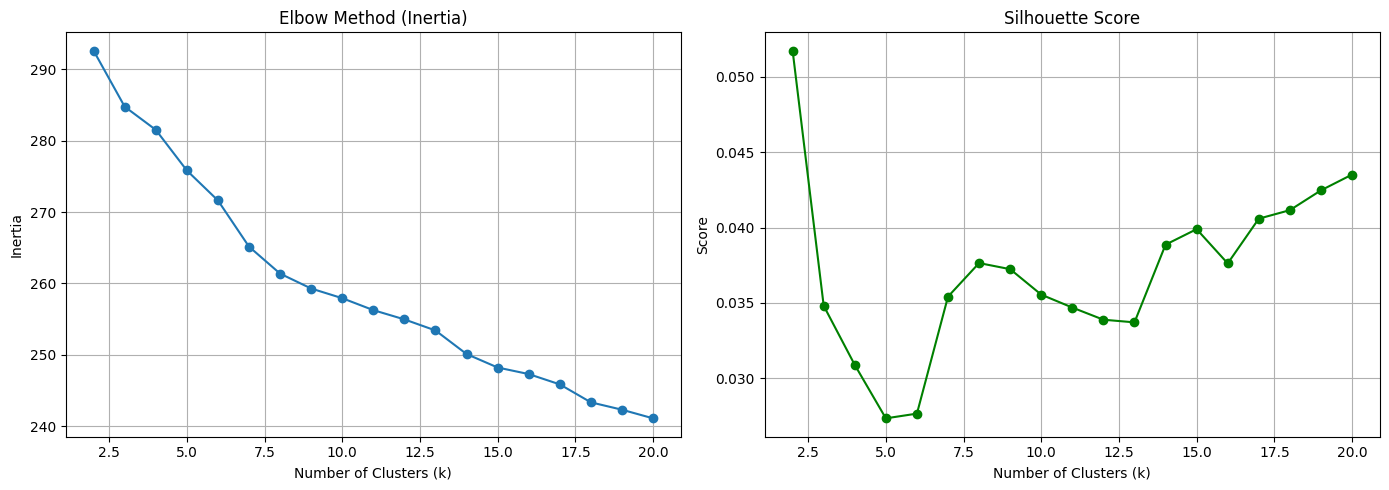


✅ Best k by Silhouette Score: 2 (score = 0.052)
📁 Plot saved to: M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\kmeans_clustering_scores.png


In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# === Paths to embedding files
base_dir = r"M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo"
yes_path = os.path.join(base_dir, "Yes", "task_action_embeddings.csv")
no_path = os.path.join(base_dir, "No", "task_action_embeddings.csv")

# === Load embeddings
df_yes = pd.read_csv(yes_path, index_col=0)
df_no = pd.read_csv(no_path, index_col=0)

# === Combine into one array
df_all = pd.concat([df_yes, df_no])
embeddings = df_all.values

# === Clustering range to test
k_values = list(range(2, 21))
inertias = []
silhouette_scores = []

print("🔍 Evaluating cluster sizes (k=2 to 20)...")

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embeddings)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(embeddings, labels))

# === Plot results
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(k_values, inertias, marker='o')
ax[0].set_title("Elbow Method (Inertia)")
ax[0].set_xlabel("Number of Clusters (k)")
ax[0].set_ylabel("Inertia")
ax[0].grid(True)

ax[1].plot(k_values, silhouette_scores, marker='o', color='green')
ax[1].set_title("Silhouette Score")
ax[1].set_xlabel("Number of Clusters (k)")
ax[1].set_ylabel("Score")
ax[1].grid(True)

plt.tight_layout()

# === Save plot as PNG
png_path = os.path.join(base_dir, "kmeans_clustering_scores.png")
plt.savefig(png_path)
plt.show()

# === Print best score
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

print(f"\n✅ Best k by Silhouette Score: {best_k} (score = {best_score:.3f})")
print(f"📁 Plot saved to: {png_path}")


In [ ]:
k-means

In [5]:
import os
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
import csv

# === Input files
root_dir = r"M:\FULL_DATA_COLLECTED\FINAL_DATASET"
yes_file = os.path.join(root_dir, "prompt4YesNo", "Yes", "gpt4o_task_action_final_yes.xlsx")
no_file = os.path.join(root_dir, "prompt4YesNo", "No", "gpt4o_task_action_final_no.xlsx")

# === Output directory
output_dir = os.path.join(root_dir, "prompt4YesNo")
summary_csv = os.path.join(output_dir, "topic_summary_kmeans20.csv")
summary_xlsx = os.path.join(output_dir, "topic_summary_kmeans20.xlsx")
doc_topics_csv = os.path.join(output_dir, "doc_topics_kmeans20.csv")
doc_xlsx = os.path.join(output_dir, "doc_topics_kmeans20.xlsx")
target_dist_csv = os.path.join(output_dir, "target_distribution_kmeans20.csv")

# === Load and merge labeled Task–Action files
df_yes = pd.read_excel(yes_file)
df_no = pd.read_excel(no_file)
df = pd.concat([df_yes, df_no], ignore_index=True)

# === Rename content column if needed
if "Task-Action Response" in df.columns:
    df["text"] = df["Task-Action Response"]
else:
    raise ValueError("Missing 'Task-Action Response' column.")

# === Clean up empty values
df = df[df["text"].notna() & (df["text"].str.strip() != "")]

print(f"📄 Loaded {len(df)} Task–Action responses (Target 1: {df['Target'].sum()}, Target 0: {len(df) - df['Target'].sum()})")

# === Embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# === BERTopic with KMeans (k=20)
vectorizer_model = CountVectorizer(stop_words="english")
kmeans_model = KMeans(n_clusters=20, random_state=42)

topic_model = BERTopic(
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    hdbscan_model=kmeans_model,  # override default HDBSCAN
    verbose=True
)

# === Fit model
docs = df["text"].tolist()
topics, probs = topic_model.fit_transform(docs)

# === Save topic summary
topic_info = topic_model.get_topic_info()
topic_info.to_csv(summary_csv, index=False, quoting=csv.QUOTE_ALL)
topic_info.to_excel(summary_xlsx, index=False)

# === Save document-topic assignments
doc_info = topic_model.get_document_info(docs)
doc_info["file"] = df["Prompt File"]
doc_info["target"] = df["Target"]
doc_info.to_csv(doc_topics_csv, index=False, quoting=csv.QUOTE_ALL)
doc_info.to_excel(doc_xlsx, index=False)

# === Target distribution + size
target_distribution = doc_info.groupby("Topic")["target"].value_counts(normalize=True).unstack().fillna(0)
cluster_sizes = doc_info["Topic"].value_counts().sort_index()
target_distribution["Size"] = cluster_sizes
target_distribution.to_csv(target_dist_csv)

# === Final output
print("\n✅ Output saved:")
print(f"- Topic summary CSV:   {summary_csv}")
print(f"- Topic summary XLSX:  {summary_xlsx}")
print(f"- Doc topics CSV:      {doc_topics_csv}")
print(f"- Doc topics XLSX:     {doc_xlsx}")
print(f"- Target distribution: {target_dist_csv}")

# === Display results
print("\n🔍 Target distribution by topic (% + size):")
percent_cols = target_distribution.drop(columns="Size") * 100
percent_cols["Size"] = target_distribution["Size"]
print(percent_cols.round(2))


📄 Loaded 822 Task–Action responses (Target 1: 390, Target 0: 432)


2025-04-16 18:48:44,875 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/26 [00:00<?, ?it/s]

2025-04-16 18:49:17,463 - BERTopic - Embedding - Completed ✓
2025-04-16 18:49:17,468 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-16 18:49:33,162 - BERTopic - Dimensionality - Completed ✓
2025-04-16 18:49:33,164 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-16 18:49:33,194 - BERTopic - Cluster - Completed ✓
2025-04-16 18:49:33,204 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-16 18:49:33,347 - BERTopic - Representation - Completed ✓



✅ Output saved:
- Topic summary CSV:   M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\topic_summary_kmeans20.csv
- Topic summary XLSX:  M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\topic_summary_kmeans20.xlsx
- Doc topics CSV:      M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\doc_topics_kmeans20.csv
- Doc topics XLSX:     M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\doc_topics_kmeans20.xlsx
- Target distribution: M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\target_distribution_kmeans20.csv

🔍 Target distribution by topic (% + size):
target      0       1  Size
Topic                      
0       55.71   44.29    70
1       40.62   59.38    64
2       41.94   58.06    62
3       60.78   39.22    51
4       56.86   43.14    51
5       71.43   28.57    49
6       45.83   54.17    48
7       64.58   35.42    48
8       55.56   44.44    45
9       67.50   32.50    40
10      53.85   46.15    39
11      30.77   69.23    39
12      48.72   51.28    39
13      55.26   4

In [6]:
import pandas as pd

# === Manual cluster data for KMeans-20
data = {
    "Topic": list(range(20)),
    "Size": [
        70, 64, 62, 51, 51, 49, 48, 48, 45, 40,
        39, 39, 39, 38, 34, 28, 27, 23, 19, 8
    ],
    "% Target=0": [
        55.71, 40.62, 41.94, 60.78, 56.86, 71.43, 45.83, 64.58, 55.56, 67.50,
        53.85, 30.77, 48.72, 55.26, 61.76, 17.86, 55.56, 69.57, 57.89, 0.00
    ],
    "% Target=1": [
        44.29, 59.38, 58.06, 39.22, 43.14, 28.57, 54.17, 35.42, 44.44, 32.50,
        46.15, 69.23, 51.28, 44.74, 38.24, 82.14, 44.44, 30.43, 42.11, 100.00
    ],
    "Top Keywords": [
        ['length', 'packet', 'checks', 'buffer', 'check', 'bounds', 'added', 'limit', 'action', 'task'],
        ['length', 'action', 'check', 'task', 'condition', 'len', 'size', 'added', 'end', 'ensure'],
        ['overflow', 'size', 'integer', 'bit', 'check', 'buffer', 'action', 'task', 'developer', '32'],
        ['return', 'action', 'task', 'check', 'added', 'error', 'code', 'invalid', 'valid', 'values'],
        ['socket', 'skb', 'sk', 'action', 'task', 'function', 'ensure', 'code', 'removed', 'destination'],
        ['msg_namelen', 'leak', 'memory', 'structure', 'information', 'memset', 'initialized', 'initialize', 'zero', 'line'],
        ['user', 'process', 'key', 'task', 'function', 'check', 'child', 'action', 'new', 'ensure'],
        ['buffer', 'size', 'memory', 'buffers', 'allocated', 'developer', 'usb', 'stack', 'allocation', 'action'],
        ['null', 'function', 'developer', 'proc', 'error', 'task', 'action', 'reference', 'tty', 'pointer'],
        ['url', 'session', 'content', 'page', 'action', 'csp', 'task', 'policy', 'security', 'requests'],
        ['pages', 'guest', 'vcpu', 'mode', 'kvm', 'page', 'vma', 'calls', 'removed', 'action'],
        ['image', 'pixel', 'columns', 'width', 'allocation', 'color', 'number', 'images', 'bytes_per_line', 'action'],
        ['lock', 'locking', 'race', 'event', 'task', 'timer', 'shm_file', 'functions', 'thread', 'action'],
        ['pointer', 'stack', 'address', 'checks', 'action', 'task', 'check', 'io', 'invalid', 'condition'],
        ['iovec', 'disk', 'inode', 'flags', 'function', 'block', 'extents', 'bp', 'action', 'logic'],
        ['php', 'version', 'bug', 'zval', 'related', 'memory', 'zend_string', 'string', 'function', 'include'],
        ['dentry', 'path', 'directory', 'function', 'target', 'task', 'req', 'action', 'symlink', 'nd'],
        ['node', 'nodes', 'element', 'document', 'developer', 'attribute', 'action', 'task', 'added', 'password'],
        ['mm', 'null', 'strncpy', 'fixed', 'copying', 'ensure', 'fix', 'action', 'function', 'task'],
        ['image', 'destroyimage', 'box', 'loader_', 'ppb_urlloader_impl', 'user_buffer_', 'reconstruct_image', 'resources', 'member', 'ops']
    ]
}

# === Human-readable summaries
summaries = [
    "Length and bounds check for packet or buffer validation",
    "Length checks combined with task/action logic",
    "Integer overflow and bit-level buffer size issues",
    "Return/action validation with error codes",
    "Socket-related function/task-based processing",
    "Memory leak prevention via struct/zero initialization",
    "User/task/process flow and access validation",
    "Buffer/memory allocation across stack/USB/heap",
    "Null pointer checks in function/proc-based logic",
    "URL/session and CSP-related content security logic",
    "KVM/vCPU/page management and guest OS interactions",
    "Image layout, pixel width, and rendering bounds",
    "Lock/race/timer/thread concurrency handling",
    "Pointer/stack/address error and I/O checks",
    "Disk/inode/extent/block mappings and structure flags",
    "PHP/Zval/bug/string-specific memory vulnerabilities",
    "Path traversal and symlink/directory logic",
    "DOM node/document/attribute-related logic",
    "Null/strncpy/memcopy safety patching",
    "Chrome PPB image resource management logic"
]

# === Construct DataFrame
df = pd.DataFrame(data)
df["Cluster Summary"] = summaries

# === Label clusters by dominant target
def classify(row):
    if row["% Target=1"] >= 65:
        return "High Vulnerability (🟥)"
    elif row["% Target=0"] >= 65:
        return "Likely Safe (🟩)"
    else:
        return "Mixed/Neutral (🟨)"

df["Cluster Type"] = df.apply(classify, axis=1)

# === Save to Excel
output_path = r"M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\llm_topic_cluster_summary_kmeans20.xlsx"
df.to_excel(output_path, index=False)

print(f"✅ Saved KMeans-20 summary to:\n{output_path}")


✅ Saved KMeans-20 summary to:
M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\llm_topic_cluster_summary_kmeans20.xlsx


In [ ]:
# hdbscan, keybert inspired

In [7]:
import os
import pandas as pd
import csv
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer

# === Input files
root_dir = r"M:\FULL_DATA_COLLECTED\FINAL_DATASET"
yes_file = os.path.join(root_dir, "prompt4YesNo", "Yes", "gpt4o_task_action_final_yes.xlsx")
no_file = os.path.join(root_dir, "prompt4YesNo", "No", "gpt4o_task_action_final_no.xlsx")

# === Output directory
output_dir = os.path.join(root_dir, "prompt4YesNo")
summary_csv = os.path.join(output_dir, "topic_summary_keybert.csv")
summary_xlsx = os.path.join(output_dir, "topic_summary_keybert.xlsx")
doc_topics_csv = os.path.join(output_dir, "doc_topics_keybert.csv")
doc_xlsx = os.path.join(output_dir, "doc_topics_keybert.xlsx")
target_dist_csv = os.path.join(output_dir, "target_distribution_keybert.csv")

# === Load and merge Task–Action response files
df_yes = pd.read_excel(yes_file)
df_no = pd.read_excel(no_file)
df = pd.concat([df_yes, df_no], ignore_index=True)

# === Normalize text column
if "Task-Action Response" in df.columns:
    df["text"] = df["Task-Action Response"]
else:
    raise ValueError("Missing 'Task-Action Response' column.")

# === Clean empty values
df = df[df["text"].notna() & (df["text"].str.strip() != "")]

print(f"📄 Loaded {len(df)} Task–Action responses (Target 1: {df['Target'].sum()}, Target 0: {len(df) - df['Target'].sum()})")

# === Embedding and vectorizer models
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
vectorizer_model = CountVectorizer(stop_words="english")
representation_model = KeyBERTInspired()

# === BERTopic with KeyBERTInspired
topic_model = BERTopic(
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    verbose=True
)

# === Fit BERTopic
docs = df["text"].tolist()
topics, probs = topic_model.fit_transform(docs)

# === Topic summary
topic_info = topic_model.get_topic_info()
topic_info.to_csv(summary_csv, index=False, quoting=csv.QUOTE_ALL)
topic_info.to_excel(summary_xlsx, index=False)

# === Document-topic assignments
doc_info = topic_model.get_document_info(docs)
doc_info["file"] = df["Prompt File"]
doc_info["target"] = df["Target"]
doc_info.to_csv(doc_topics_csv, index=False, quoting=csv.QUOTE_ALL)
doc_info.to_excel(doc_xlsx, index=False)

# === Target distribution + cluster sizes
target_distribution = doc_info.groupby("Topic")["target"].value_counts(normalize=True).unstack().fillna(0)
cluster_sizes = doc_info["Topic"].value_counts().sort_index()
target_distribution["Size"] = cluster_sizes
target_distribution.to_csv(target_dist_csv)

# === Output summary
print("\n✅ Output saved:")
print(f"- Topic summary CSV:   {summary_csv}")
print(f"- Topic summary XLSX:  {summary_xlsx}")
print(f"- Doc topics CSV:      {doc_topics_csv}")
print(f"- Doc topics XLSX:     {doc_xlsx}")
print(f"- Target distribution: {target_dist_csv}")

# === Display % per cluster
print("\n🔍 Target distribution by topic (% + size):")
percent_cols = target_distribution.drop(columns="Size") * 100
percent_cols["Size"] = target_distribution["Size"]
print(percent_cols.round(2))


📄 Loaded 822 Task–Action responses (Target 1: 390, Target 0: 432)


2025-04-17 18:30:16,513 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/26 [00:00<?, ?it/s]

2025-04-17 18:30:48,639 - BERTopic - Embedding - Completed ✓
2025-04-17 18:30:48,656 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-17 18:30:51,145 - BERTopic - Dimensionality - Completed ✓
2025-04-17 18:30:51,149 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-17 18:30:51,258 - BERTopic - Cluster - Completed ✓
2025-04-17 18:30:51,276 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-17 18:30:58,217 - BERTopic - Representation - Completed ✓



✅ Output saved:
- Topic summary CSV:   M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\topic_summary_keybert.csv
- Topic summary XLSX:  M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\topic_summary_keybert.xlsx
- Doc topics CSV:      M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\doc_topics_keybert.csv
- Doc topics XLSX:     M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\doc_topics_keybert.xlsx
- Target distribution: M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\target_distribution_keybert.csv

🔍 Target distribution by topic (% + size):
target      0      1  Size
Topic                     
-1      52.65  47.35   245
 0      52.20  47.80   159
 1      68.42  31.58    57
 2      43.75  56.25    48
 3      55.81  44.19    43
 4      30.00  70.00    40
 5      64.10  35.90    39
 6      25.00  75.00    32
 7      77.42  22.58    31
 8      51.85  48.15    27
 9      55.00  45.00    20
 10     63.16  36.84    19
 11     61.54  38.46    13
 12     46.15  53.85    13
 13     46

In [ ]:
# summary

In [8]:
import pandas as pd

# === Manual cluster data from KeyBERT run ===
data = {
    "Topic": list(range(-1, 16)),
    "Size": [245, 159, 57, 48, 43, 40, 39, 32, 31, 27, 20, 19, 13, 13, 13, 12, 11],
    "% Target=0": [
        52.65, 52.20, 68.42, 43.75, 55.81, 30.00, 64.10, 25.00, 77.42, 51.85,
        55.00, 63.16, 61.54, 46.15, 46.15, 33.33, 54.55
    ],
    "% Target=1": [
        47.35, 47.80, 31.58, 56.25, 44.19, 70.00, 35.90, 75.00, 22.58, 48.15,
        45.00, 36.84, 38.46, 53.85, 53.85, 66.67, 45.45
    ],
    "Top Keywords": [
        ['crash', 'struct', 'memory', 'pointer', 'buffer', 'checking', 'file', 'checks', 'functions', 'task'],
        ['buffer', 'bounds', 'reads', 'allocating', 'size_max', 'loop', 'chunk', 'overflow', 'checks', 'pkt_len'],
        ['site_for_cookies', 'url_replacement_enabled', 'csp', 'browser', 'ensuring', 'task', 'cookies', 'javascript', 'security', 'prevent'],
        ['cap_sys_admin', 'executable', 'pid', 'process', 'pids', 'proc', 'permissions', 'privileges', 'permission', 'capability'],
        ['skb', 'udp', 'skbs', 'socket', 'sctp', 'packet', 'ip_mroute_setsockopt', 'packets', 'sk_type', 'protocol'],
        ['insufficientimagedatainfile', 'pixels', 'bytes_per_line', 'memory', 'bitmap', 'getpixels', 'next_image', 'tbuf_size', 'images', 'pixel'],
        ['fail', 'cms_verify', 'validate', 'audit_log_single_execve_arg', 'command', 'tls_desc_okay', 'invalid', 'validation', 'assert', 'commands'],
        ['zend_smart_str', 'zend_string', 'php_smart_str', 'php', 'bug', 'install_static', 'unserialize', 'zval', 'serialized', 'changes'],
        ['sco_sock_recvmsg', 'uninitialized', 'allocated', 'msg_name', 'memory', 'msg_namelen', 'rfcomm_defer_setup', 'leakage', 'bt_sock_unregister', 'leaks'],
        ['mutex_lock_double', 'ioctl_lock', 'locking', 'perf_event_ctx_unlock', 'concurrent', 'bind_lock', 'lock', 'mutex', 'mutexes', 'unlock'],
        ['symlinks', 'symlink', 'unlink', 'rename', 'path_connected', 'mnt_root', 'paths', 'flush_merge', 'directory', 'path'],
        ['__kvm_set_xcr', 'kvm_count_lock', 'kvm_x2apic_cid_bits', 'kvm', 'vcpu', 'secondary_vm_exec_control', 'vm_end', 'vmcs_host_cr4', 'vm', 'vm_start'],
        ['vmap_stack', 'allocated', 'vmapped', 'usb_dev_cap_header', 'memory', 'buffers', 'buffer', 'x86_64', 'heap', 'allocate'],
        ['check_stack_boundary', 'ptr_to_stack', 'stack', 'pte_hole', 'ptrace', 'pointers', 'pointer', 'regs_a', 'security_mmap_addr', 'mmap_min_addr'],
        ['kvm_unpin_pages', 'kvm_iommu_put_pages', 'vm_fault_sigbus', 'vm_ops', 'memory', 'faults', 'local_nr_pages', 'pages', 'pagemlocked', 'put_page'],
        ['iov_fault_in_pages_write', 'iov_len', 'in_iov', 'scsi_init_iovec', 'iov_iter_truncate', 'iov_iter_advance', 'iovec', 'iov_count', 'iov_iter_init', 'iov_base'],
        ['ext4_ext_data_valid2', 'ext4_ext_data_valid1', 'ext4_jbd2_file_inode', 'f2fs_init_extent_tree', 'ext4_convert_unwritten_extents_endio', 'ext4_sb', 'xfs_da3_node_crc_off', 'ext4', 'f2fs_i', 'xfs']
    ]
}

# === Cluster summaries
summaries = [
    "General memory/pointer/struct safety and file checks",
    "Buffer bounds, overflow protection and allocation size limits",
    "Cookie security, URL/csp enforcement in browser tasks",
    "Process privilege elevation via cap_sys_admin or PID misuse",
    "Socket/UDP/SCTP skbs and protocol packet handling",
    "Image/pixel layout validation and bitmap size enforcement",
    "CMS or command signature verification failure scenarios",
    "PHP serialization logic via zend_string or zval issues",
    "Uninitialized memory and leaks in Bluetooth SCO socket recvmsg",
    "Double locking and mutex contention around IOCTL events",
    "Symlink and path traversal issues via rename/unlink",
    "KVM virtualization and execution context (xcr/kvm_set)",
    "VM-mapped USB memory allocation and stack buffer control",
    "Stack boundary and pointer integrity validation",
    "KVM page fault handling and IOMMU page unpinning",
    "IOV-related memory handling and SCSI iovec issues",
    "EXT4/F2FS inode and extent mapping metadata errors"
]

# === Create and label DataFrame
df = pd.DataFrame(data)
df["Cluster Summary"] = summaries

def classify(row):
    if row["% Target=1"] >= 65:
        return "High Vulnerability (🟥)"
    elif row["% Target=0"] >= 65:
        return "Likely Safe (🟩)"
    else:
        return "Mixed/Neutral (🟨)"

df["Cluster Type"] = df.apply(classify, axis=1)

# === Save to file
output_path = r"M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\llm_topic_cluster_summary_keybert.xlsx"
df.to_excel(output_path, index=False)

print(f"✅ Summary saved to:\n{output_path}")


✅ Summary saved to:
M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\llm_topic_cluster_summary_keybert.xlsx


In [ ]:
# checking if they are project specific clusters

In [9]:
import pandas as pd

# === Path to your KeyBERT topic assignments
doc_topics_path = r"M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\doc_topics_keybert.csv"

# === Load document-topic assignments
df = pd.read_csv(doc_topics_path)

# === Extract project name from file (e.g., '12_libmodbus_abc123.txt' → 'libmodbus')
if "Project" not in df.columns:
    df["Project"] = df["file"].str.extract(r"^\d+_([^_]+)_")

# === Optional sanity check
print(f"📄 Loaded {len(df)} rows across {df['Project'].nunique()} projects and {df['Topic'].nunique()} clusters.")

# === Crosstab: rows = Topic, columns = Project → count of samples per combo
topic_project_counts = pd.crosstab(df["Topic"], df["Project"])

# === Normalize: show percentage of each topic coming from each project
topic_project_ratio = topic_project_counts.div(topic_project_counts.sum(axis=1), axis=0)

# === Save both for review
out_dir = r"M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo"
topic_project_counts.to_excel(os.path.join(out_dir, "topic_project_counts_keybert.xlsx"))
topic_project_ratio.to_excel(os.path.join(out_dir, "topic_project_ratio_keybert.xlsx"))

# === Preview top ratios
print("\n🔍 Top 10 topics by project ratio (%):")
print(topic_project_ratio.head(10).round(2))


📄 Loaded 822 rows across 93 projects and 17 clusters.

🔍 Top 10 topics by project ratio (%):
Project  Espruino  FFmpeg  ImageMagick  ImageMagick6  \
Topic                                                  
-1           0.00    0.05         0.02          0.01   
 0           0.01    0.01         0.02          0.00   
 1           0.00    0.00         0.00          0.00   
 2           0.00    0.00         0.00          0.00   
 3           0.00    0.00         0.00          0.00   
 4           0.00    0.02         0.45          0.02   
 5           0.00    0.00         0.00          0.00   
 6           0.00    0.00         0.00          0.00   
 7           0.00    0.00         0.00          0.00   
 8           0.00    0.00         0.00          0.00   

Project  LibRaw-demosaic-pack-GPL2  Little-CMS  PDFGen  VeraCrypt  WavPack  \
Topic                                                                        
-1                            0.00        0.00    0.00        0.0     0.00   


In [10]:
import pandas as pd
import os

# === Input & Output Paths
doc_topics_path = r"M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\doc_topics_keybert.csv"
output_csv = r"M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\top_projects_per_topic_keybert.csv"

# === Load topic assignments
df = pd.read_csv(doc_topics_path)

# === Extract project from file name (e.g., 12_libmodbus_hash.txt → libmodbus)
df["Project"] = df["file"].str.extract(r"^\d+_([^_]+)_")

# === Count per Topic–Project
topic_project_counts = df.groupby(["Topic", "Project"]).size().reset_index(name="Count")

# === Total per Topic
topic_totals = topic_project_counts.groupby("Topic")["Count"].sum().reset_index(name="Total")

# === Merge to compute percentage
merged = pd.merge(topic_project_counts, topic_totals, on="Topic")
merged["Percentage"] = 100 * merged["Count"] / merged["Total"]

# === Sort and take Top 10 projects per topic
top_projects = (
    merged.sort_values(["Topic", "Percentage"], ascending=[True, False])
    .groupby("Topic")
    .head(10)
)

# === Format nicely
top_projects["Percentage"] = top_projects["Percentage"].round(2)
top_projects = top_projects[["Topic", "Project", "Count", "Percentage"]]

# === Save to CSV
top_projects.to_csv(output_csv, index=False)

print(f"✅ Top projects per topic saved to:\n{output_csv}")


✅ Top projects per topic saved to:
M:\FULL_DATA_COLLECTED\FINAL_DATASET\prompt4YesNo\top_projects_per_topic_keybert.csv
